## Verificação do sinal
Encontrou-se um valor destoante de ac2rad em 'vertical-misalignment/0.63mm/61.8496.csv'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dados no tempo
signals = pd.read_csv('../mafaulda/vertical-misalignment/0.63mm/61.8496.csv', header=None, 
                      names=['tacometro', 'ax1', 'rad1', 'tg1', 
                            'ax2', 'rad2', 'tg2', 'microfone'])

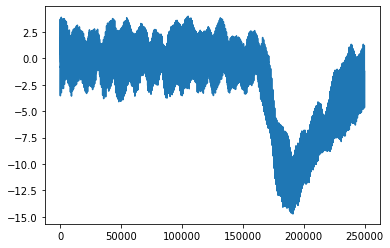

In [3]:
signals['ax2'].plot();

# Corrigindo o DataFrame
Deve ser rodado uma única vez.

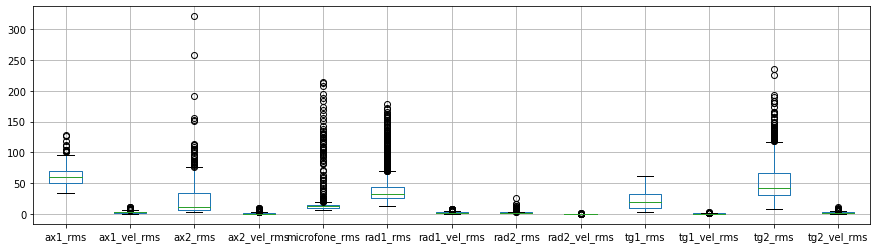

In [4]:
# abre arquivo e mostra o outlier
df = pd.read_csv('../data.csv')

rms = [col for col in list(df.columns) if 'rms' in col]
df[rms].boxplot(figsize=(15,4));

In [5]:
# medias = [col for col in list(df.columns) if 'mean' in col]
# df[medias].boxplot(figsize=(10,4));

In [6]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao_manual'] > 60.5), ['defeito', 'severidade', 'rotacao_manual', 'ax2_rms', 'ax2_vel_rms']]

,defeito,severidade,rotacao_manual,ax2_rms,ax2_vel_rms
296,desalinhamento_vertical,0.63,60.8256,53.659326,0.809808
297,desalinhamento_vertical,0.63,61.8496,320.842618,1.556902


Por simplificação e por similaridade, o valor do sinal mais próximo (rot_vel=60.825) será copiado

In [7]:
# substitui valor
# df.at[297,'ax2_mean'] = df.at[296,'ax2_mean']
df.at[297,'ax2_rms']  = df.at[296,'ax2_rms']
df.at[297,'ax2_vel_rms']  = df.at[296,'ax2_vel_rms'] 

In [8]:
df.loc[(df['severidade'] == 0.63) & (df['rotacao_manual'] > 60.5), ['defeito', 'severidade','rotacao_manual', 'ax2_rms', 'ax2_vel_rms']]

,defeito,severidade,rotacao_manual,ax2_rms,ax2_vel_rms
296,desalinhamento_vertical,0.63,60.8256,53.659326,0.809808
297,desalinhamento_vertical,0.63,61.8496,53.659326,0.809808


In [9]:
# salva mudança no arquivo
f = open("../data.csv", "w")
df.to_csv(f, line_terminator='\n', index=False)
f.close()

## Checagem final

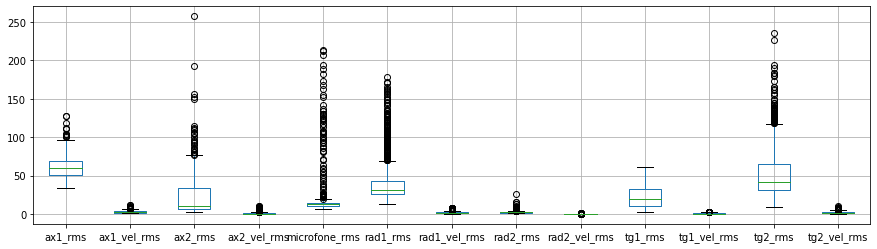

In [10]:
# abre novamente arquivo em nova variável
df_NEW = pd.read_csv('../data.csv')

df_NEW[rms].boxplot(figsize=(15,4));

In [11]:
df_NEW.loc[df_NEW['ax2_vel_rms'].argmax()]

defeito           desalinhamento_vertical
severidade                           0.63
rotacao_manual                           12.4928
rotacao_calc                       12.2244
ax1_1h                            5.78784
ax1_2h                           0.416418
ax1_3h                            4.71733
ax1_entr                          2.92969
ax1_kurt                        -0.991748
ax1_phase                         86.1038
ax1_rms                           75.9619
ax1_vel_rms                        3.8938
ax2_1h                            37.4947
ax2_2h                            12.6299
ax2_3h                            5.97964
ax2_entr                          3.27597
ax2_kurt                        -0.243401
ax2_phase                         12.3645
ax2_rms                           95.3247
ax2_vel_rms                        10.569
microfone_1h                      0.62723
microfone_2h                     0.114664
microfone_3h                     0.564907
microfone_entr            

# Investigando outro pico

In [12]:
# dados no tempo
signals = pd.read_csv('../mafaulda/imbalance/35g/12.0832.csv', header=None, 
                      names=['tacometro', 'ax1', 'rad1', 'tg1', 
                            'ax2', 'rad2', 'tg2', 'microfone'])

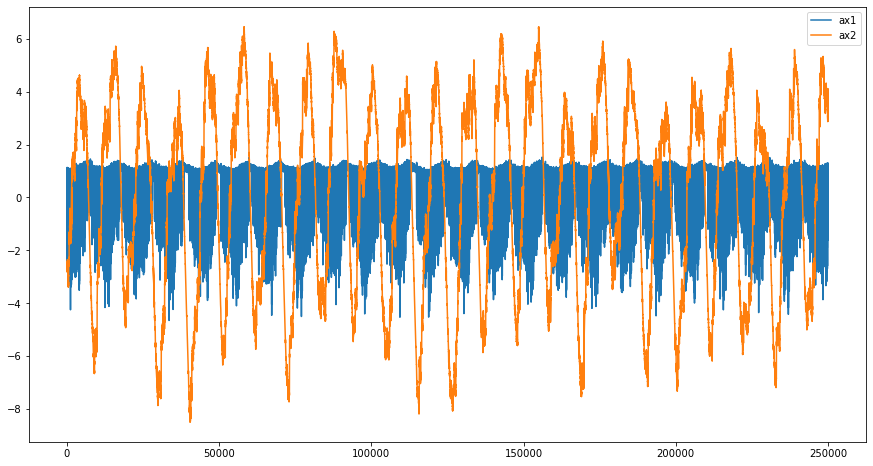

In [13]:
signals[['ax1','ax2']].plot(figsize=(15,8));

Aparentemente a baixa frequência de alta intensidade presente no sinal exacerbou o valor do RMS da velocidade.